In [38]:
import Systems
import numpy as np
import deepSI
from matplotlib import pyplot as plt

In [39]:
system = Systems.NoisyUnbalancedDisc(dt=0.1, sigma_n=[0, 0])
encoder = deepSI.load_system("systems/OutputUnbalancedDisk_dt01_e300")

In [40]:
u = deepSI.deepSI.exp_design.multisine(100000, pmax=49999, n_crest_factor_optim=20)
u = np.clip(u*1.0, -3.0, 3.0)

In [43]:
data = system.apply_experiment(deepSI.System_data(u=u))

In [45]:
test_ss_enc = encoder.apply_experiment(deepSI.System_data(u=u),save_state=True)

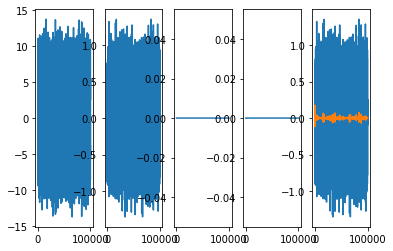

In [61]:
plt.subplot(1,5,1)
plt.plot(test_ss_enc.x[:,0] - data.x[:,0])
plt.subplot(1,5,2)
plt.plot(test_ss_enc.x[:,1] - data.x[:,1])

plt.subplot(1,5,3)
plt.plot(data.y[:,0] - data.x[:,0])
plt.subplot(1,5,4)
plt.plot(data.y[:,1] - data.x[:,1])

plt.subplot(1,5,5)
plt.plot(data.y[:,1])
plt.plot(data.y[:,1] - test_ss_enc.y)

In [33]:
system.x = system.f(system.x, u[0])
C = np.array([[0.1, 0.5]])
y = C@system.x
system.x, y

(array([-0.04509371, -0.12650374]), array([-0.06776124]))